# **NAMA : DZAKY RAIHAN AHMAD**

# **NIM :  13101204316**

# **Kelas : IF-44-05**

# **MENGGUNAKAN ANN**#

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import random as rd


STEP 1 : IMPORT DATA dan Replace Data "?" ke None

In [ ]:
dataset = pd.read_table("arrhythmia.data", sep=",", header = None)
dataset

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
for colomn in dataset:
  idx = 0
  list_idx = []
  for nilai in dataset[colomn]:
    if nilai == "?":
      list_idx.append(idx)
    idx = idx + 1
  for i in list_idx:
    dataset[colomn][i] = None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Text(0, 0.5, 'Banyak Nilai NULL')

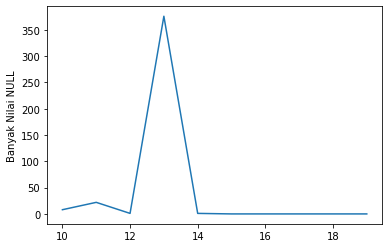

In [ ]:
pd.isnull(dataset).sum()[10:20].plot()
plt.xlabel("")
plt.ylabel("Banyak Nilai NULL")

In [ ]:
print("Cek data : ", dataset.isnull().values.any())

Cek data :  True


In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


STEP 2 : UBAH DATA KE NUMERIK KEMUDIAN DATA KOSONG DIISI DENGAN RATA RATA (MODUS dan MEDIAN BISA JUGA)

In [ ]:
dataset = dataset.apply(pd.to_numeric)

In [ ]:
for column in dataset:
  rata = dataset[column].mean()
  #angka = rd.randint(1,50)
  dataset[column].fillna(value = rata, inplace = True)

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
print("Cek data masih ada NaN: ", dataset.isnull().values.any())

Cek data masih ada NaN:  False


STEP 3 : SPLIT DATA

data Y menyimpan dataset kolom terakhir
data x sisanya

In [ ]:
y = dataset[279]
dataset.drop(279, axis = 1, inplace = True)
x = dataset

In [ ]:
# split the data into train and test set
train_x, test_x = train_test_split(x, test_size=0.35, random_state=0)
train_y, test_y = train_test_split(y, test_size=0.35, random_state=0)
#cek bentuk data
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((293, 279), (159, 279), (293,), (159,))

In [ ]:
tf.random.set_seed(3)

STEP 4 : ANN

In [ ]:
# Defining the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (279,)),
    keras.layers.Dense(745, activation='relu'),
    keras.layers.Dense(745, activation='relu'),
    keras.layers.Dense(745, activation='relu'),
    keras.layers.Dense(19, activation = "softmax")
])

# Compiling the model
model.compile(optimizer='adam',
			loss=keras.losses.SparseCategoricalCrossentropy(),
			metrics=['accuracy'])

# fitting the model
print("Data Train")
hasil = model.fit(train_x, train_y, epochs=10, validation_split = 0.1)
print("Data Test")
hasil = model.fit(test_x, test_y, epochs=10, validation_split = 0.1)



Data Train
Epoch 1/10
9/9 [==============================] - 1s 44ms/step - loss: 24.5396 - accuracy: 0.3384 - val_loss: 22.6599 - val_accuracy: 0.0667
Epoch 2/10
9/9 [==============================] - 0s 20ms/step - loss: 12.4853 - accuracy: 0.4411 - val_loss: 5.6173 - val_accuracy: 0.2667
Epoch 3/10
9/9 [==============================] - 0s 20ms/step - loss: 3.5558 - accuracy: 0.6084 - val_loss: 1.5532 - val_accuracy: 0.5333
Epoch 4/10
9/9 [==============================] - 0s 21ms/step - loss: 1.6094 - accuracy: 0.6844 - val_loss: 1.5953 - val_accuracy: 0.5333
Epoch 5/10
9/9 [==============================] - 0s 21ms/step - loss: 0.9215 - accuracy: 0.7719 - val_loss: 1.1161 - val_accuracy: 0.7333
Epoch 6/10
9/9 [==============================] - 0s 24ms/step - loss: 0.5939 - accuracy: 0.8517 - val_loss: 1.1302 - val_accuracy: 0.7333
Epoch 7/10
9/9 [==============================] - 0s 21ms/step - loss: 0.4790 - accuracy: 0.8631 - val_loss: 1.1777 - val_accuracy: 0.6667
Epoch 8/10
9/

STEP 5 : PLOTTING

In [ ]:
akurasi = hasil.history["accuracy"]
validasi = hasil.history["val_accuracy"]

In [ ]:
e = range(1, len(akurasi)+1)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

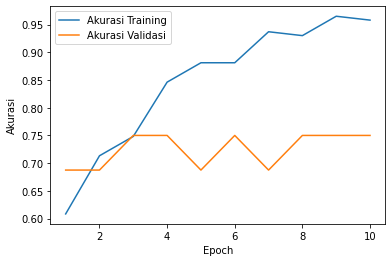

In [ ]:
plt.plot(e, akurasi, '-', label = 'Akurasi Training')
plt.plot(e, validasi, '-', label = 'Akurasi Validasi')
plt.legend(loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.plot

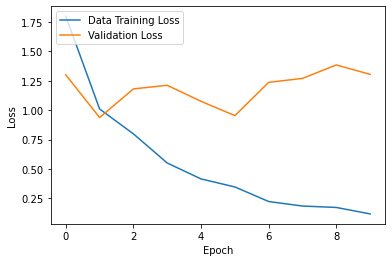

In [ ]:
plt.plot(hasil.history['loss'])
plt.plot(hasil.history['val_loss'])

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Data Training Loss', 'Validation Loss'], loc = 'upper left')

STEP 6 : EVALUATING MODEL

In [ ]:
pred_y = model.predict(test_x)
pred_y_labels = [np.argmax(i) for i in pred_y]
benar = 0
indeks = 0
for i in (test_y):
  if i == pred_y_labels[indeks]:
  #if test_y[i] == pred_y_labels[i]:
    benar += 1
  indeks += 1

persentase = benar/len(pred_y_labels)
print("Nilai akurasi : ", persentase)


5/5 [==============================] - 0s 8ms/step
Nilai akurasi :  0.9748427672955975


# **KESIMPULAN**
1. Nilai akurasi training yang lebih tinggi dari nilai akurasi validasi
2. Nilai loss training yang lebih rendah dari nilai loss validasi
3. Nilai akurasinya sebesar 0.9748